In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("data12-4-20.csv")
df

,Unnamed: 0,Country Name,total_cases,total_deaths,continent,population,Year,Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]",...,Population in the largest city (% of urban population) [EN.URB.LCTY.UR.ZS],Population in largest city [EN.URB.LCTY],"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]",Age dependency ratio (% of working-age population) [SP.POP.DPND],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN],Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD],2 weeks,4 weeks,+8 weeks
0,0,Afghanistan,1,0,Asia,38928341,2020,50.5,57.248760,162.781158,...,42.331198,4011770.0,4.758273,84.077656,466.079081,32.27117,125.41,True,True,False
1,1,Afghanistan,1,0,Asia,38928341,2020,50.5,57.248760,162.781158,...,42.331198,4011770.0,4.758273,84.077656,466.079081,32.27117,125.41,True,True,False
2,2,Afghanistan,1,0,Asia,38928341,2020,50.5,57.248760,162.781158,...,42.331198,4011770.0,4.758273,84.077656,466.079081,32.27117,125.41,True,True,False
3,3,Afghanistan,1,0,Asia,38928341,2020,50.5,57.248760,162.781158,...,42.331198,4011770.0,4.758273,84.077656,466.079081,32.27117,125.41,True,True,False
4,4,Afghanistan,1,0,Asia,38928341,2020,50.5,57.248760,162.781158,...,42.331198,4011770.0,4.758273,84.077656,466.079081,32.27117,125.41,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,5095,Zimbabwe,8,1,Africa,14862927,2020,78.1,93.942225,185.048282,...,32.576344,1515016.0,5.377887,82.951116,1142.940418,11.71069,88.75,True,False,False
5096,5096,Zimbabwe,8,1,Africa,14862927,2020,78.1,93.942225,185.048282,...,32.576344,1515016.0,5.377887,82.951116,1142.940418,11.71069,88.75,True,False,False
5097,5097,Zimbabwe,9,1,Africa,14862927,2020,78.1,93.942225,185.048282,...,32.576344,1515016.0,5.377887,82.951116,1142.940418,11.71069,88.75,True,False,False
5098,5098,Zimbabwe,9,1,Africa,14862927,2020,78.1,93.942225,185.048282,...,32.576344,1515016.0,5.377887,82.951116,1142.940418,11.71069,88.75,True,False,False


In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 55 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                 --------------  -----  
 0   Unnamed: 0                                                                                                             5100 non-null   int64  
 1   Country Name                                                                                                           5100 non-null   object 
 2   total_cases                                                                                                            5100 non-null   int64  
 3   total_deaths                                                                                                           5100 non-null   int64  
 4   

Let us see the percentage of missing data.

In [59]:
missing_percentage = df.isnull().sum()*100/df.shape[0]

missing_percentage[missing_percentage>0]

Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]                                                    15.862745
Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]                                                   4.490196
Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]                                  4.490196
Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS]                                                      1.470588
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                                                                  1.960784
Labor force, total [SL.TLF.TOTL.IN]                                                                                       6.117647
Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]                                              29.784314
Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]            

It's easy to find some of the missing information manually. For example, seems like we have a missing "Land Area" information for only one country. I will check our features and will fill the missing data manually from other resources if I can.

In [60]:
dfcountrycheck = df.groupby(by = "Country Name").sum()
dfcountrycheck

,Unnamed: 0,total_cases,total_deaths,population,Year,Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",...,Population in the largest city (% of urban population) [EN.URB.LCTY.UR.ZS],Population in largest city [EN.URB.LCTY],"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]",Age dependency ratio (% of working-age population) [SP.POP.DPND],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN],Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD],2 weeks,4 weeks,+8 weeks
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,496,2294,45,1245706912,64640,1616.0,1831.960335,5208.997062,275.2,2052.160,...,1354.598348,128376640.0,152.264730,2690.484994,14914.530606,1032.677448,4013.12,32.0,32.0,0.0
Albania,1334,3773,181,83456200,58580,2894.2,7874.748235,22030.342542,130.5,2271.657,...,797.685384,13791733.0,581.195211,1328.491084,119049.364933,392.837204,4376.97,29.0,29.0,0.0
Algeria,2826,9334,761,1578637548,72720,3477.6,9374.852856,35933.535140,306.0,2753.964,...,316.163157,96967512.0,360.771916,2070.289168,117276.367462,728.682073,5458.32,36.0,36.0,0.0
Andorra,2604,5028,116,1854360,48480,0.0,92033.533954,119488.958438,158.4,0.000,...,0.000000,0.0,0.000000,0.000000,0.000000,532.813405,0.00,24.0,0.0,0.0
Angola,2056,90,16,525860288,32320,793.6,1523.532777,2973.126410,56.0,966.064,...,616.244764,124387200.0,69.567755,1538.811847,34372.367503,317.201676,3085.60,16.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,114080,4883,24,79895721,46460,2297.7,31719.266820,45054.705025,131.1,1785.536,...,1214.915877,39950747.0,527.635646,1261.612115,326262.036246,335.210353,2682.95,23.0,0.0,0.0
Uzbekistan,109615,2356,16,736322378,44440,2200.0,2972.445487,9171.887595,114.4,1570.536,...,325.858601,54207318.0,145.334253,1088.745750,30206.321374,207.658198,3455.76,22.0,0.0,0.0
Vietnam,351995,4243,0,6813700810,141400,6566.0,8598.882176,24939.575832,245.0,5266.870,...,1661.487634,570175270.0,732.180176,3064.362338,136403.459722,561.270881,9532.60,70.0,70.0,70.0


Since our features are not changing in same country I grouped them by "Country Name". If a value of a feature is zero for a country ,this means we have missing data for the country on the feature. W

In [61]:
missing_percentage = df.isnull().sum()*100/df.shape[0]

missing_percentage[missing_percentage>0]

Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]                                                    15.862745
Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]                                                   4.490196
Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]                                  4.490196
Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS]                                                      1.470588
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                                                                  1.960784
Labor force, total [SL.TLF.TOTL.IN]                                                                                       6.117647
Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]                                              29.784314
Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]            

In [62]:
features_can_found_manually = ["Population in largest city [EN.URB.LCTY]",
                               "Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",
                               "Labor force, total [SL.TLF.TOTL.IN]",
                               "Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]",
                               "Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]",
                               "Net migration [SM.POP.NETM]",
                               "People using at least basic drinking water services, rural (% of rural population) [SH.H2O.BASW.RU.ZS]",
                               "People using at least basic drinking water services, urban (% of urban population) [SH.H2O.BASW.UR.ZS]",
                               "People using at least basic sanitation services, rural (% of rural population) [SH.STA.BASS.RU.ZS]",
                               "People using at least basic sanitation services, urban  (% of urban population) [SH.STA.BASS.UR.ZS]",
                               "Rural population (% of total population) [SP.RUR.TOTL.ZS]",
                               "School enrollment, primary (% gross) [SE.PRM.ENRR]",
                               "School enrollment, secondary (% gross) [SE.SEC.ENRR]",
                               "School enrollment, tertiary (% gross) [SE.TER.ENRR]",
                               "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) [SH.ALC.PCAP.LI]",
                               "Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]"]

In [63]:
for feature in features_can_found_manually:
    for country in dfcountrycheck.index:
        if dfcountrycheck.loc[country,feature] == 0:
            print("{} is missing for {}".format(feature,country))

Population in largest city [EN.URB.LCTY] is missing for Andorra
Population in largest city [EN.URB.LCTY] is missing for Antigua and Barbuda
Population in largest city [EN.URB.LCTY] is missing for Aruba
Population in largest city [EN.URB.LCTY] is missing for Barbados
Population in largest city [EN.URB.LCTY] is missing for Bermuda
Population in largest city [EN.URB.LCTY] is missing for Bhutan
Population in largest city [EN.URB.LCTY] is missing for Cayman Islands
Population in largest city [EN.URB.LCTY] is missing for Cyprus
Population in largest city [EN.URB.LCTY] is missing for Dominica
Population in largest city [EN.URB.LCTY] is missing for Fiji
Population in largest city [EN.URB.LCTY] is missing for French Polynesia
Population in largest city [EN.URB.LCTY] is missing for Gibraltar
Population in largest city [EN.URB.LCTY] is missing for Greenland
Population in largest city [EN.URB.LCTY] is missing for Grenada
Population in largest city [EN.URB.LCTY] is missing for Guam
Population in la

In [64]:
#https://en.wikipedia.org/wiki/Andorra_la_Vella
for i in df[df["Country Name"]=="Andorra"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 22886
    
#https://en.wikipedia.org/wiki/St._John%27s,_Antigua_and_Barbuda
for i in df[df["Country Name"]=="Antigua and Barbuda"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 21926
    
#https://worldpopulationreview.com/countries/aruba-population/cities/
for i in df[df["Country Name"]=="Aruba"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 29998

#https://worldpopulationreview.com/countries/barbados-population/cities/
for i in df[df["Country Name"]=="Barbados"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 98511
    
#https://population.mongabay.com/population/bermuda/    
for i in df[df["Country Name"]=="Bermuda"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 1896

#https://www.geonames.org/BT/largest-cities-in-bhutan.html
for i in df[df["Country Name"]=="Bhutan"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 98676
    
#https://en.wikipedia.org/wiki/George_Town,_Cayman_Islands
for i in df[df["Country Name"]=="Cayman Islands"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 40200
    
#https://simple.wikipedia.org/wiki/Nicosia
for i in df[df["Country Name"]=="Cyprus"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 310355
    
#https://www.geonames.org/DM/largest-cities-in-dominica.html
for i in df[df["Country Name"]=="Dominica"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 16571

#https://tr.wikipedia.org/wiki/Suva
for i in df[df["Country Name"]=="Fiji"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 85691
    
#https://en.wikipedia.org/wiki/Faaa
for i in df[df["Country Name"]=="French Polynesia"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 29506
    
#https://population.mongabay.com/population/gibraltar
for i in df[df["Country Name"]=="Gibraltar"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 26544
    
#https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Greenland
for i in df[df["Country Name"]=="Greenland"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 17984
    
#https://population.mongabay.com/population/grenada
for i in df[df["Country Name"]=="Grenada"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 7500
    
#https://www.geonames.org/GU/largest-cities-in-guam.html
for i in df[df["Country Name"]=="Guam"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 44943
    
#https://www.geonames.org/GY/largest-cities-in-guyana.html
for i in df[df["Country Name"]=="Guyana"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 235017
    
#https://en.wikipedia.org/wiki/Localities_of_Iceland
for i in df[df["Country Name"]=="Iceland"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 124847

#https://www.geonames.org/IM/largest-cities-in-isle-of-man.html
for i in df[df["Country Name"]=="Isle of Man"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 26218
    
#https://population.mongabay.com/population/kosovo/
for i in df[df["Country Name"]=="Kosovo"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 550000
    
#https://population.mongabay.com/population/liechtenstein/
for i in df[df["Country Name"]=="Liechtenstein"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 5748
    
#https://www.geonames.org/LU/largest-cities-in-luxembourg.html
for i in df[df["Country Name"]=="Luxembourg"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 76684
    
#https://www.geonames.org/MV/largest-cities-in-maldives.html
for i in df[df["Country Name"]=="Maldives"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 103693
    
#https://www.geonames.org/MT/largest-cities-in-malta.html
for i in df[df["Country Name"]=="Malta"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 21676
    
#https://population.mongabay.com/population/mauritius/
for i in df[df["Country Name"]=="Mauritius"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 155226
    
#https://population.mongabay.com/population/monaco/
for i in df[df["Country Name"]=="Monaco"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 32965
    
#https://worldpopulationreview.com/countries/montenegro-population/cities/
for i in df[df["Country Name"]=="Montenegro"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 136473
    
#https://population.mongabay.com/population/new-caledonia/
for i in df[df["Country Name"]=="New Caledonia"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 93060
    
#https://www.geonames.org/SM/largest-cities-in-san-marino.html
for i in df[df["Country Name"]=="San Marino"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 9258
    
#https://worldpopulationreview.com/countries/seychelles-population/cities/
for i in df[df["Country Name"]=="Seychelles"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 22881
    
#https://www.geonames.org/SI/largest-cities-in-slovenia.html
for i in df[df["Country Name"]=="Slovenia"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 272200
    
#https://www.geonames.org/SR/largest-cities-in-suriname.html
for i in df[df["Country Name"]=="Suriname"].index:
    df.loc[i,"Population in largest city [EN.URB.LCTY]"] = 223757

My job is done with "Population in largest city" feature.

In [65]:
dfcountrycheck = df.groupby(by = "Country Name").sum()

for feature in features_can_found_manually:
    for country in dfcountrycheck.index:
        if dfcountrycheck.loc[country,feature] == 0:
            print("{} is missing for {}".format(feature,country))

Life expectancy at birth, total (years) [SP.DYN.LE00.IN] is missing for Andorra
Life expectancy at birth, total (years) [SP.DYN.LE00.IN] is missing for Dominica
Life expectancy at birth, total (years) [SP.DYN.LE00.IN] is missing for Gibraltar
Life expectancy at birth, total (years) [SP.DYN.LE00.IN] is missing for Isle of Man
Life expectancy at birth, total (years) [SP.DYN.LE00.IN] is missing for Monaco
Labor force, total [SL.TLF.TOTL.IN] is missing for Andorra
Labor force, total [SL.TLF.TOTL.IN] is missing for Antigua and Barbuda
Labor force, total [SL.TLF.TOTL.IN] is missing for Aruba
Labor force, total [SL.TLF.TOTL.IN] is missing for Bermuda
Labor force, total [SL.TLF.TOTL.IN] is missing for Cayman Islands
Labor force, total [SL.TLF.TOTL.IN] is missing for Dominica
Labor force, total [SL.TLF.TOTL.IN] is missing for Gibraltar
Labor force, total [SL.TLF.TOTL.IN] is missing for Greenland
Labor force, total [SL.TLF.TOTL.IN] is missing for Grenada
Labor force, total [SL.TLF.TOTL.IN] is mi

In [66]:
#https://www.indexmundi.com/andorra/life_expectancy_at_birth.html
for i in df[df["Country Name"]=="Andorra"].index:
    df.loc[i,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]"] = float(82.9)
    
#https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=DM
for i in df[df["Country Name"]=="Dominica"].index:
    df.loc[i,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]"] = float(76.6)
    
#https://www.indexmundi.com/gibraltar/life_expectancy_at_birth.html
for i in df[df["Country Name"]=="Gibraltar"].index:
    df.loc[i,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]"] = float(79.7)
    
#https://www.indexmundi.com/isle_of_man/life_expectancy_at_birth.html
for i in df[df["Country Name"]=="Isle of Man"].index:
    df.loc[i,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]"] = float(81.4)
    
#https://www.indexmundi.com/monaco/life_expectancy_at_birth.html
for i in df[df["Country Name"]=="Monaco"].index:
    df.loc[i,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]"] = float(89.4)

My job is done with "Life expectancy at birth"

In [67]:
dfcountrycheck = df.groupby(by = "Country Name").sum()

for feature in features_can_found_manually:
    for country in dfcountrycheck.index:
        if dfcountrycheck.loc[country,feature] == 0:
            print("{} is missing for {}".format(feature,country))

Labor force, total [SL.TLF.TOTL.IN] is missing for Andorra
Labor force, total [SL.TLF.TOTL.IN] is missing for Antigua and Barbuda
Labor force, total [SL.TLF.TOTL.IN] is missing for Aruba
Labor force, total [SL.TLF.TOTL.IN] is missing for Bermuda
Labor force, total [SL.TLF.TOTL.IN] is missing for Cayman Islands
Labor force, total [SL.TLF.TOTL.IN] is missing for Dominica
Labor force, total [SL.TLF.TOTL.IN] is missing for Gibraltar
Labor force, total [SL.TLF.TOTL.IN] is missing for Greenland
Labor force, total [SL.TLF.TOTL.IN] is missing for Grenada
Labor force, total [SL.TLF.TOTL.IN] is missing for Isle of Man
Labor force, total [SL.TLF.TOTL.IN] is missing for Kosovo
Labor force, total [SL.TLF.TOTL.IN] is missing for Liechtenstein
Labor force, total [SL.TLF.TOTL.IN] is missing for Monaco
Labor force, total [SL.TLF.TOTL.IN] is missing for San Marino
Labor force, total [SL.TLF.TOTL.IN] is missing for Seychelles
Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS] is 

In [68]:
#https://www.indexmundi.com/andorra/labor_force.html
for i in df[df["Country Name"]=="Andorra"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 39750
    
#https://www.nationmaster.com/country-info/profiles/Antigua-and-Barbuda/Labor
for i in df[df["Country Name"]=="Antigua and Barbuda"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 30000
    
#https://www.indexmundi.com/aruba/labor_force.html
for i in df[df["Country Name"]=="Aruba"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 51610
    
#https://www.gov.bm/articles/2018-labour-force-survey
for i in df[df["Country Name"]=="Bermuda"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 36646
    
#http://www.gov.ky/portal/page/portal/cighome/pressroom/archive/201709/Labour%20Force%20Has%20Grown
for i in df[df["Country Name"]=="Cayman Islands"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 43545
    
#https://www.ceicdata.com/en/indicator/kosovo/labour-force-participation-rate
for i in df[df["Country Name"]=="Kosovo"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 40500
    
#https://www.indexmundi.com/liechtenstein/labor_force.html
for i in df[df["Country Name"]=="Liechtenstein"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 38520
    
#https://www.indexmundi.com/monaco/labor_force.html
for i in df[df["Country Name"]=="Monaco"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 52000
    
#https://www.economy.com/san-marino/labor-force
for i in df[df["Country Name"]=="San Marino"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 22577
    
#https://www.ceicdata.com/en/seychelles/labour-force
for i in df[df["Country Name"]=="Seychelles"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 71130
    
#https://www.nationmaster.com/country-info/profiles/Dominica/Labor
for i in df[df["Country Name"]=="Dominica"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 25000
    
#https://theodora.com/wfbcurrent/gibraltar/gibraltar_economy.html
for i in df[df["Country Name"]=="Gibraltar"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 24420
    
#https://www.cia.gov/library/publications/the-world-factbook/geos/print_gl.html
for i in df[df["Country Name"]=="Greenland"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 26840
    
#https://www.indexmundi.com/grenada/labor_force.html
for i in df[df["Country Name"]=="Grenada"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 55270
    
#https://www.indexmundi.com/isle_of_man/labor_force.html
for i in df[df["Country Name"]=="Isle of Man"].index:
    df.loc[i,"Labor force, total [SL.TLF.TOTL.IN]"] = 41790

My job is done with "Labor force, total". I will prefer to go on with excel for the rest of the manual process.


Literacy Rate:
Andorra
https://www.indexmundi.com/andorra/literacy.html

Australia
https://www.aihw.gov.au/reports/children-youth/childrens-headline-indicators/contents/12-literacy

Austria
https://www.indexmundi.com/austria/literacy.html

Belgium
https://www.indexmundi.com/belgium/literacy.html

Bermuda
https://www.ncbi.nlm.nih.gov/pubmed/12178115

Cayman Islands
https://en.wikipedia.org/wiki/Education_in_the_Cayman_Islands

Djibouti
https://www.indexmundi.com/djibouti/literacy.html

French Polynesia
https://www.indexmundi.com/french_polynesia/literacy.html

Gibraltar
http://www.phrasebase.com/countries/gibraltar/

Greenland
http://www.phrasebase.com/countries/greenland/

Guam
https://www.indexmundi.com/guam/literacy.html

Iceland
https://www.indexmundi.com/iceland/literacy.html

Ireland
https://www.indexmundi.com/ireland/literacy.html

Kosovo
https://www.indexmundi.com/kosovo/literacy.html

For Rest
https://www.worldatlas.com/articles/the-highest-literacy-rates-in-the-world.html

Alcohol Consumption per capita:
https://www.who.int/substance_abuse/publications/global_status_report_2004_overview.pdf

In [69]:
df = pd.read_csv("data14-4-2020.csv")
df

,Unnamed: 0,Unnamed: 0.1,Country Name,total_cases,total_deaths,continent,population,Year,Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],...,Population in the largest city (% of urban population) [EN.URB.LCTY.UR.ZS],Population in largest city [EN.URB.LCTY],"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]",Age dependency ratio (% of working-age population) [SP.POP.DPND],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN],Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD],2 weeks,4 weeks,+8 weeks
0,0,0,Afghanistan,1,0,Asia,38928341,2020,50.5,57.248760,...,42.331198,4011770.0,4.758273,84.077656,466.079081,32.27117,125.41,True,True,False
1,1,1,Afghanistan,1,0,Asia,38928341,2020,50.5,57.248760,...,42.331198,4011770.0,4.758273,84.077656,466.079081,32.27117,125.41,True,True,False
2,2,2,Afghanistan,1,0,Asia,38928341,2020,50.5,57.248760,...,42.331198,4011770.0,4.758273,84.077656,466.079081,32.27117,125.41,True,True,False
3,3,3,Afghanistan,1,0,Asia,38928341,2020,50.5,57.248760,...,42.331198,4011770.0,4.758273,84.077656,466.079081,32.27117,125.41,True,True,False
4,4,4,Afghanistan,1,0,Asia,38928341,2020,50.5,57.248760,...,42.331198,4011770.0,4.758273,84.077656,466.079081,32.27117,125.41,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,5095,5095,Zimbabwe,8,1,Africa,14862927,2020,78.1,93.942225,...,32.576344,1515016.0,5.377887,82.951116,1142.940418,11.71069,88.75,True,False,False
5096,5096,5096,Zimbabwe,8,1,Africa,14862927,2020,78.1,93.942225,...,32.576344,1515016.0,5.377887,82.951116,1142.940418,11.71069,88.75,True,False,False
5097,5097,5097,Zimbabwe,9,1,Africa,14862927,2020,78.1,93.942225,...,32.576344,1515016.0,5.377887,82.951116,1142.940418,11.71069,88.75,True,False,False
5098,5098,5098,Zimbabwe,9,1,Africa,14862927,2020,78.1,93.942225,...,32.576344,1515016.0,5.377887,82.951116,1142.940418,11.71069,88.75,True,False,False


In [70]:
missing_percentage = df.isnull().sum()*100/df.shape[0]

missing_percentage = missing_percentage[missing_percentage>0]

missing_percentage


Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]                                                    15.862745
Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]                                                   4.490196
Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]                                  4.490196
Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS]                                                      1.470588
People using at least basic drinking water services, rural (% of rural population) [SH.H2O.BASW.RU.ZS]                   14.862745
People using at least basic drinking water services, urban (% of urban population) [SH.H2O.BASW.UR.ZS]                   11.843137
People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]                                        0.333333
People using at least basic sanitation services, rural (% of rural population) [SH.

Our data is not good for interpolation since every country have discrete and unique values.
So we will fill the missing with the median of countries' continent on given feature. 

In [71]:
for feature in df:    
    for continent in df["continent"].unique():
        for index in df[df[feature].isnull()].index:
            ctnt =df[(df["continent"] ==continent)]
            df.loc[index,feature] = np.median(ctnt[ctnt[feature].isnull() == False][feature])
    

We used only non-missing data to find continents' median on given feature.

In [72]:
missing_percentage = df.isnull().sum()*100/df.shape[0]

missing_percentage = missing_percentage[missing_percentage>0]

missing_percentage

Series([], dtype: float64)

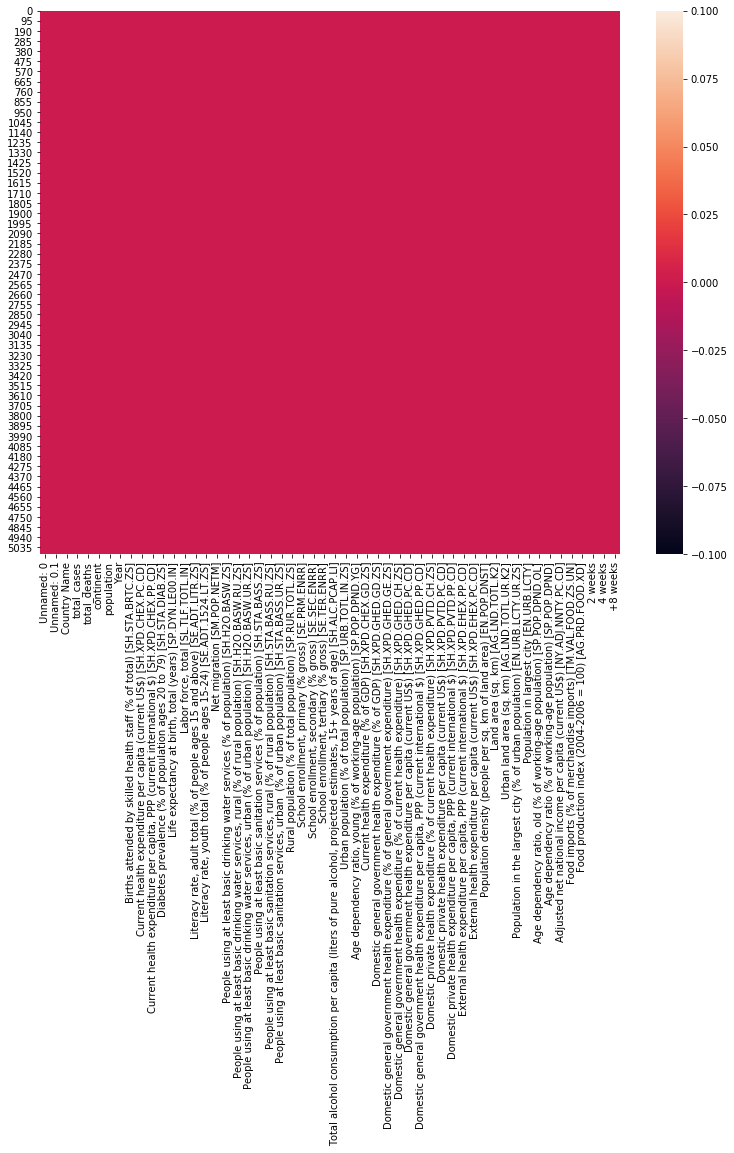

In [73]:
plt.figure(figsize=(13,10))
sns.heatmap(df.isnull())

Now we are ready to play with our data!

In [ ]:
df.to_csv("")